In [75]:
my_msmt_name = 'XX_69'


execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
folder=tb.latest_data(my_msmt_name)
name = 'ssro_results'
a = pqsequence.TailAnalysis(folder, hdf5_mode='r')#, pq_folder='bs_remote')
agrp=a.adwingrp('adwindata')
print folder
%matplotlib inline

d:\measuring\data
d:\measuring\data\20160819\025329_Purification_111no2_SIL2_Purify35_XX_69


(<matplotlib.figure.Figure at 0x9d8eed0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0xeebb250>,
  <matplotlib.axes._subplots.AxesSubplot at 0xf601b30>))

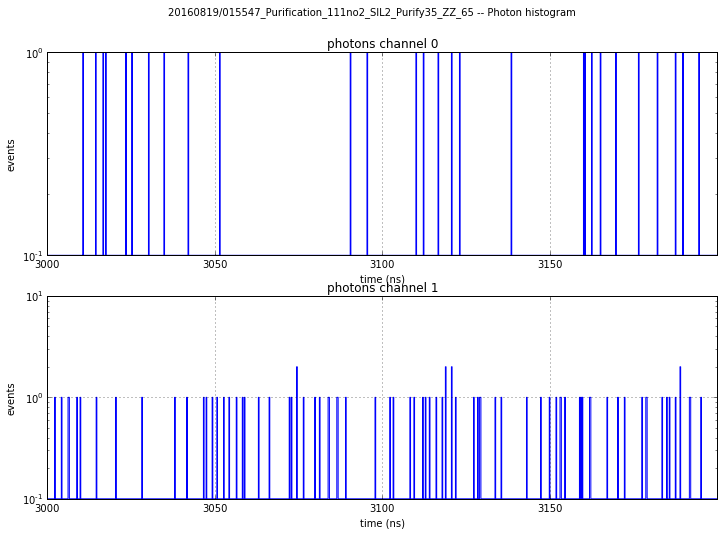

In [61]:
pq_plots.plot_photon_hist(
    a.pqf,start =3e6,#,2.41E6,#+0.5e6,  
    length = 0.2E6, 
    hist_binsize = 2e2, 
    save = False, 
    log=True)

#pq_plots.plot_photon_hist(a.pqf,start = 2920E3,  length = 500E3, hist_binsize = 1E3, save = False, log=True)

The number of markers is: 6811


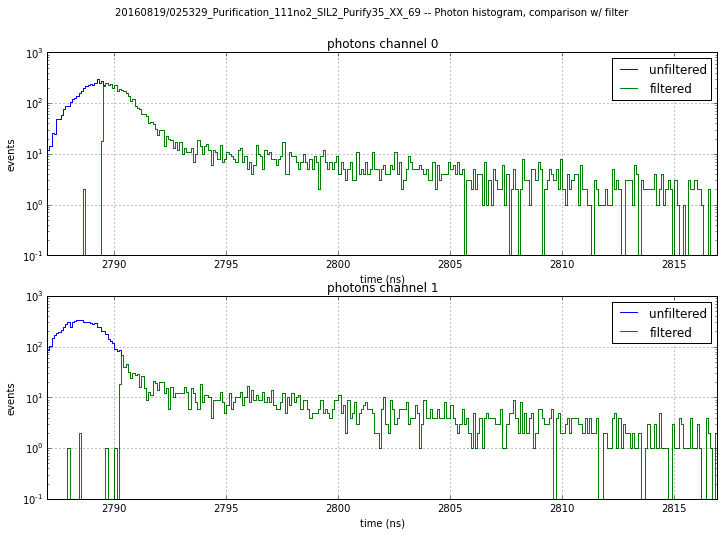

In [77]:
### when looking for PLU windows

pq_plots.plot_marker_filter_comparison(a.pqf,
                          mrkr_chan = 1,
                          start = 2.787e6,#3.04E6-0.3E6,#+2.23e6, #settings.bs_process_params['st_start_ch0'],  
                          length= 0.03e6,#settings.bs_process_params['st_len']+settings.bs_process_params['pulse_sep'], 
                          hist_binsize = 100,save = False,log=True)

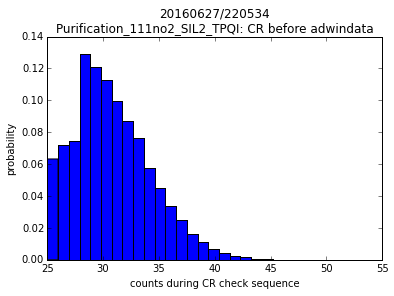

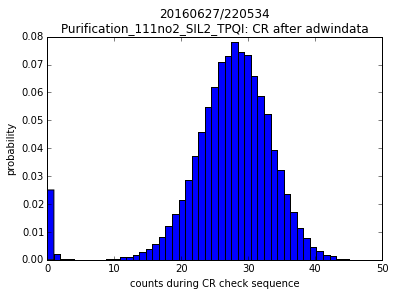

In [4]:
#### plot sweep pts vs. cr counts

# a.get_sweep_pts()
a.get_cr_results(name='adwindata',plot= True)
# a.plot_cr_vs_sweep(ionization_crit = 3)